# Exploratory Data Analysis in Python

For data analysis, Exploratory Data Analysis (EDA) must be your first step. Exploratory Data Analysis helps us to
- To give insight into a data set.
- Understand the underlying structure.
- Extract important parameters and relationships that hold between them.
- Test underlying assumptions

## Understanding EDA using sample Data set
To understand EDA using python, we can take the sample data either directly from any website or from your local disk. I’m taking the sample data from the UCI Machine Learning Repository which is publicly available of a red variant of Wine Quality data set and try to grab much insight into the data set using EDA.

To start with,
- Firstly, import the necessary library, pandas in the case.
- Read the csv file using read_csv() function of pandas library and each data is separated by the delimiter “;” in given data set.
- Return the first five observation from the data set with the help of “.head” function provided by the pandas library. We can get last five observation similarly by using the “.tail()” function of pandas library.

In [2]:
import pandas as pd
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We can get the total number of rows and columns from the data set using “.shape” like below

In [4]:
df.shape

(1599, 12)

To find what all columns it contains, of what types and if they contain any value in it or not, with the help of info() function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


By observing the above data, we can conclude −
- Data contain an only float an integer value.
- All the columns variable are non-null (no-empty or missing value).

Another useful function provided by pandas is describe() which provides the count, mean, standard deviation, minimum and maximum values and the quantities of the data.

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- From above data, we can conclude that the mean value of most of the columns is less than the median value (50%) in index column.
- There is a huge difference between the 75% and max values of predictors `residual sugar`, `free sulfur dioxide` and `total sulfur dioxide`.
- Above two observations, gives an indication that there are extreme values- deviations in our data set.

Couples of key insights we can get from dependent variables are as follow 

In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

- In `quality` score scale, 1 comes at the bottom .i.e. poor and 10 comes at the top .i.e. best.
- From above we can conclude, none of the observation score 1(poor), 2 and 9, 10(best) score. All the scores are between 3 to 8.

In [8]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- Above processed data provide an information on vote count for each quality score in descending order.
- Most of the quality are in the range of 5-7.
- Least observations are observed in the 3 and 6 categories.

## Data Visualizations

### To check Missing Values −
We can check missing values in our white-whiskey csv data set with the help of seaborn library.
Below is the code to fullfil that −

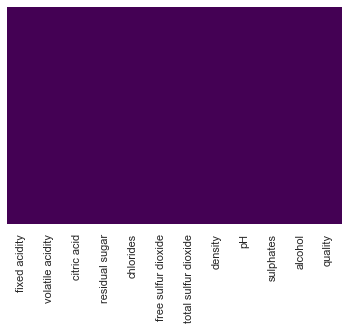

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

- From above we can see there is no missing values in the dataset. Incase if there is any, we would have seen figure represented by different colour shade on purple background.
- With different dataset where there are missing values and you’ll notice the difference.

### To check correlation
To check correlation between different values of the dataset, insert below code in our existing dataset 

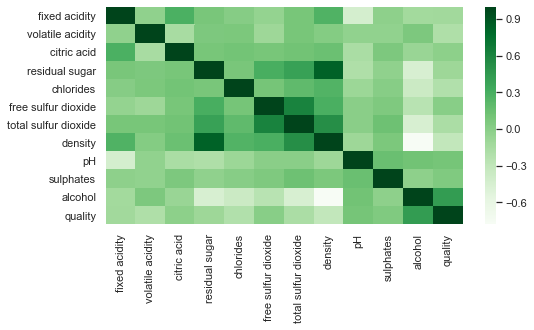

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='Greens',annot=False)

- Above, positive correlation is represented by dark shades and negative correlation by lighter shades.
- Changes the value of annot=True, and the output will show you values by which features are correlated to each other in grid-cells.

We can generate another correlation matrix with annot=True. Modify your code by adding below lines of code to our existing code −

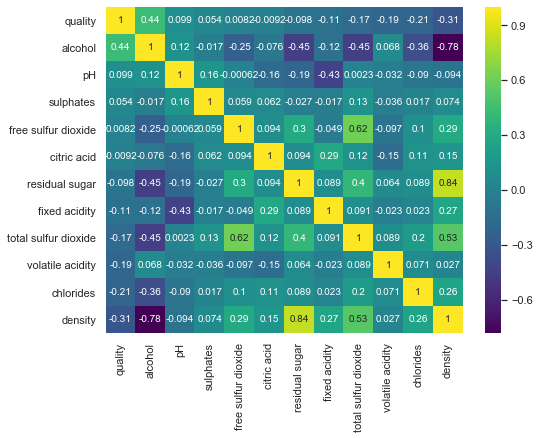

In [11]:
k = 12
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

- From above we can see, there is a strong positive correlation of `density` with `residual sugar`. However, a strong negative correlation of `density` and `alcohol`.
- Also, there is no correlation between `free sulphur dioxide` and `quality`.